# See how topic clusters change over chunk size

In [64]:
from rolling.pdf import list_pdfs, read_pdf
pdfs = list_pdfs()
len(pdfs), pdfs[:3]

(1020,
 ['./arxiv_downloads\\0808.2870v1.Measuring_Distance_and_Properties_of_the_Milky_Way_s_Central_Supermassive_Black_Hole_with_Stellar_Orbits.pdf',
  './arxiv_downloads\\0809.4677v1.Approaching_the_event_horizon__1_3mm_VLBI_of_SgrA_.pdf',
  './arxiv_downloads\\0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pdf'])

In [65]:
papers = [
    read_pdf(p) for p in pdfs
]

MuPDF error: syntax error: cannot find ExtGState resource 'A1'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find E

In [66]:
from collections import Counter

def is_good_pdf(text):
    wc = Counter(text)
    cc = len(text)
    white_space_count = wc[' ']
    white_space_ratio = white_space_count / cc
    white_space_good = 0.25 > white_space_ratio > 0.05
    word_count_good = 20000 > len(text.split()) > 1000
    return white_space_good and word_count_good

good_paper_idcs = [
    i for i, paper in enumerate(papers) if is_good_pdf(paper)
]
good_papers = [
    papers[i] for i in good_paper_idcs
]
len(good_papers), len(papers), len(good_papers) / len(papers)

(984, 1020, 0.9647058823529412)

In [67]:
# re-calc empbeddings
from rolling.embedding import GTEEmbeddingModel
model = GTEEmbeddingModel()
model.max_size

8192

In [68]:
import numpy as np
from rolling.pdf import chunk_text

paper_embeddings = np.array([
    np.mean(
        model.encode([c for c in chunk_text(p, 1024, hard_cut=False, overlap=True) if len(c) > 512]),
        axis=0
    ) for p in good_papers
])

d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\rolling_embedding\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


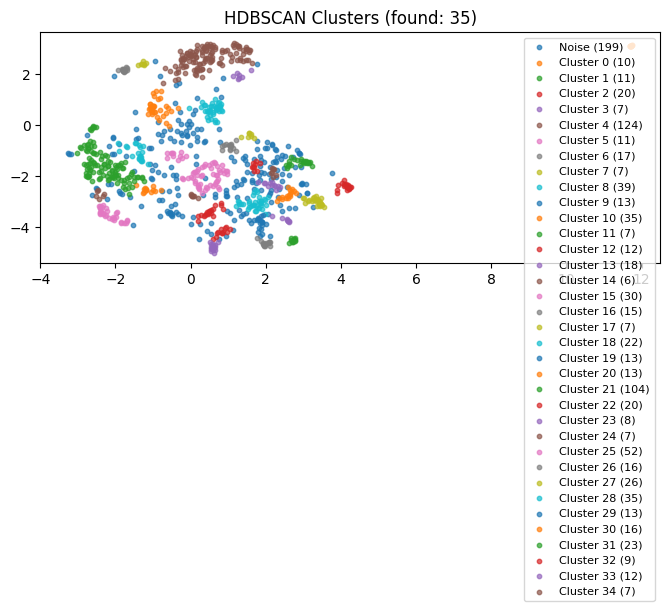

In [74]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import umap

emb_2d = umap.UMAP(n_components=2).fit_transform(paper_embeddings)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(emb_2d)
labels = clusterer.labels_

plt.figure(figsize=(8, 3))
unique_labels = np.unique(labels)
for label in unique_labels:
    mask = labels == label
    label_display = f'Cluster {label}' if label != -1 else 'Noise'
    plt.scatter(emb_2d[mask, 0], emb_2d[mask, 1], s=10, alpha=0.7, label=f'{label_display} ({np.sum(mask)})')

plt.title(f'HDBSCAN Clusters (found: {len(set(labels)) - (1 if -1 in labels else 0)})')
plt.legend(loc='best', fontsize=8)
plt.show()

In [79]:
indecies = np.where(labels == 4)[0]
len(indecies), indecies

(124,
 array([  7,  10,  63,  69,  85,  96, 117, 128, 141, 144, 168, 186, 187,
        190, 211, 242, 243, 262, 263, 275, 281, 285, 296, 300, 303, 305,
        310, 321, 324, 325, 327, 331, 333, 337, 348, 352, 361, 362, 363,
        365, 366, 382, 384, 388, 390, 393, 402, 403, 404, 408, 411, 421,
        428, 429, 430, 431, 436, 442, 443, 446, 447, 455, 459, 460, 467,
        470, 471, 474, 478, 485, 497, 499, 504, 515, 517, 520, 521, 523,
        528, 533, 535, 539, 540, 541, 545, 552, 559, 561, 562, 570, 572,
        573, 576, 592, 607, 613, 633, 642, 660, 687, 689, 708, 710, 711,
        716, 719, 731, 776, 777, 795, 799, 835, 845, 865, 876, 883, 892,
        910, 912, 936, 942, 957, 967, 982]))

In [ ]:
papers = [
    papers[i] for i in indecies
]

In [89]:
text = " ".join(papers)
len(text)

6824326

In [91]:
embeddings = model.encode(chunk_text(text, 1536, hard_cut=False, overlap=True), progressbar=True)
embeddings.shape

100%|██████████| 280/280 [00:15<00:00, 17.78it/s]


(8957, 768)

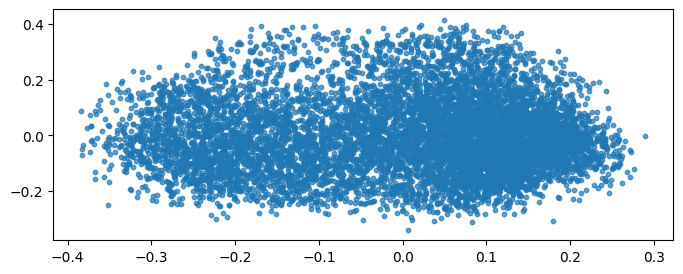

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 3))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], s=10, alpha=0.7)
plt.show()

In [117]:
from scipy.spatial import ConvexHull

hull = ConvexHull(emb_2d)
area = hull.volume
area

0.41049129506324056

---
# Test how reducing chunk size transfers to movement speed

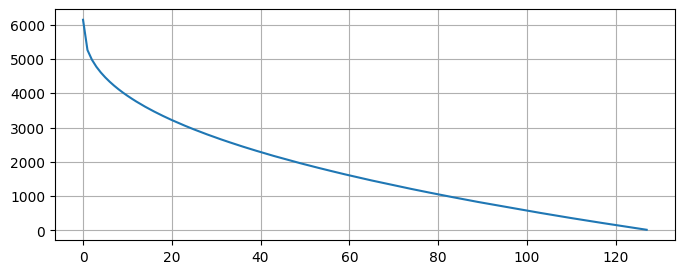

array([6144, 5261, 4979, 4774, 4607, 4464, 4337, 4222, 4116, 4018, 3927,
       3841, 3759, 3682, 3607, 3536, 3468, 3403, 3339, 3278, 3218, 3161,
       3105, 3050, 2997, 2945, 2895, 2845, 2797, 2750, 2703, 2658, 2613,
       2570, 2527, 2484, 2443, 2402, 2362, 2323, 2284, 2245, 2208, 2170,
       2134, 2097, 2062, 2026, 1992, 1957, 1923, 1890, 1857, 1824, 1791,
       1759, 1728, 1696, 1665, 1634, 1604, 1574, 1544, 1515, 1485, 1456,
       1428, 1399, 1371, 1343, 1315, 1288, 1261, 1233, 1207, 1180, 1154,
       1128, 1102, 1076, 1050, 1025, 1000,  975,  950,  925,  901,  876,
        852,  828,  805,  781,  757,  734,  711,  688,  665,  642,  620,
        597,  575,  553,  530,  509,  487,  465,  443,  422,  401,  379,
        358,  337,  316,  296,  275,  255,  234,  214,  194,  173,  153,
        133,  114,   94,   74,   55,   35,   16], dtype=int32)

In [22]:
import numpy as np
start_val = 6144
end_val = 16
num_points = 128
p = 0.4

x_linear = np.linspace(0, 1, num_points)
chunk_sizes = end_val + (start_val - end_val) * (1 - x_linear**p)
chunk_sizes = np.round(chunk_sizes, 0).astype(np.int32)
chunk_sizes = np.sort(np.unique(chunk_sizes))[::-1]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(chunk_sizes)
plt.grid(True)
plt.show()

chunk_sizes

In [121]:
embeddings_evolved = []

from tqdm import tqdm
for chunk_size in tqdm(chunk_sizes):
    chunk_size = int(chunk_size)
    embeddings_evolved.append(model.encode(chunk_text(text, chunk_size, hard_cut=True, overlap=True)))

100%|██████████| 128/128 [40:03<00:00, 18.78s/it]


In [122]:
# because my kernel kept crashing..
import pickle
with open("./plot_exports/embeddings_evolved.pkl", "wb") as f:
    pickle.dump(embeddings_evolved, f)

In [1]:
import pickle
embeddings_evolved = pickle.load(open("./plot_exports/embeddings_evolved.pkl", "rb"))

In [6]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import numpy as np

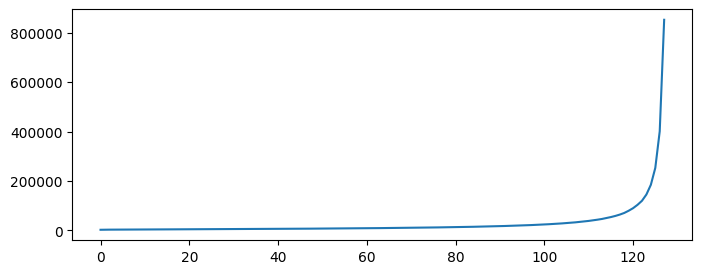

In [3]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot([len(x) for x in embeddings_evolved], label="chunk size")
plt.show()

In [ ]:
all_embeddings = np.concatenate(embeddings_evolved)
all_embeddings.shape

(3846394, 768)

In [ ]:
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

---
# Volume evolution

100%|██████████| 128/128 [00:32<00:00,  3.91it/s]


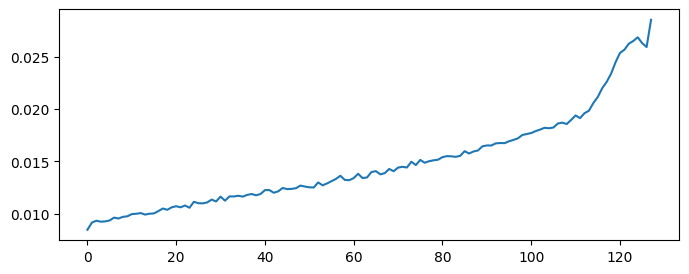

In [9]:
hull_sizesmd = np.array([
    ConvexHull(PCA(n_components=5).fit_transform(x)).volume
    for x in tqdm(embeddings_evolved)
])
plt.figure(figsize=(8, 3))
plt.plot(hull_sizesmd)
plt.show()

100%|██████████| 128/128 [00:27<00:00,  4.63it/s]


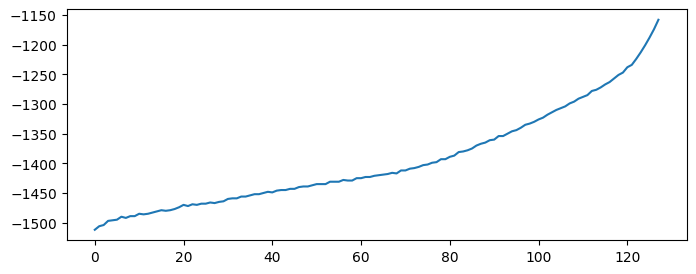

In [12]:
log_volumes = []
for embeddings in tqdm(embeddings_evolved):
    X = np.stack(embeddings)
    log_vol = np.sum(np.log(X.max(axis=0) - X.min(axis=0) + 1e-10))
    log_volumes.append(log_vol)

plt.figure(figsize=(8, 3))
plt.plot(log_volumes)
plt.show()


---
# Cluster Count evolution

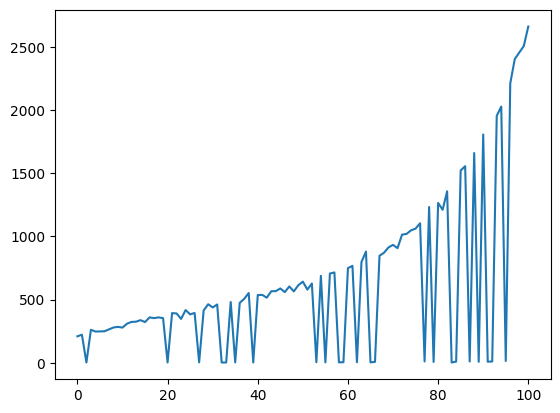

array([ 209,  222,    2,  261,  247,  248,  249,  264,  279,  284,  278,
        309,  323,  325,  337,  322,  359,  353,  359,  353,    2,  393,
        390,  347,  417,  383,  394,    3,  414,  463,  438,  461,    2,
          2,  481,    3,  474,  506,  552,    2,  536,  537,  515,  566,
        567,  588,  559,  604,  565,  614,  642,  579,  627,    4,  688,
          3,  706,  715,    3,    4,  749,  767,    4,  797,  880,    3,
          7,  847,  871,  913,  933,  907, 1014, 1020, 1048, 1062, 1104,
         10, 1233,    6, 1265, 1211, 1357,    2,    9, 1522, 1556,   10,
       1660,    7, 1807,    8,   10, 1954, 2028,   14, 2212, 2404, 2456,
       2507, 2662])

In [ ]:
# super slow!
import hdbscan
from tqdm import tqdm
cluster_count = []

for i, embeddings in tqdm(enumerate(embeddings_evolved)):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=2).fit(embeddings)
    labels = clusterer.labels_
    cluster_count.append(len(set(labels)) - (1 if -1 in labels else 0))
cluster_count = np.array(cluster_count)
plt.figure(figsize=(8, 3))
plt.plot(cluster_count)
plt.show()

---

100%|██████████| 127/127 [00:09<00:00, 13.20it/s]


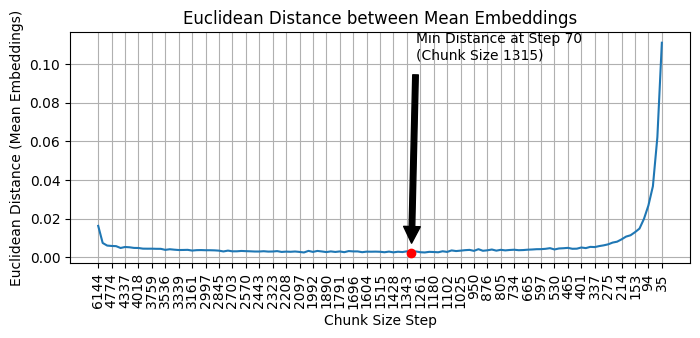

The lowest point on the curve is 0.0024 at chunk size step 70, corresponding to chunk size 1315.


In [35]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

distances = []
for i in tqdm(range(len(embeddings_evolved) - 1)):
    mu1 = np.mean(np.stack(embeddings_evolved[i]), axis=0)
    mu2 = np.mean(np.stack(embeddings_evolved[i+1]), axis=0)
    dist = np.linalg.norm(mu1 - mu2)
    distances.append(dist)

plt.figure(figsize=(8, 3))
plt.plot(distances)
plt.xlabel('Chunk Size Step')
plt.ylabel('Euclidean Distance (Mean Embeddings)')
plt.title('Euclidean Distance between Mean Embeddings')
xticks = list(range(0, len(chunk_sizes), 3))
plt.xticks(xticks, labels=[str(chunk_sizes[i]) for i in xticks], rotation=90)
plt.grid(True)

min_distance = min(distances)
min_index = distances.index(min_distance)

plt.plot(min_index, min_distance, 'ro')
plt.annotate(f"Min Distance at Step {min_index}\n(Chunk Size {chunk_sizes[min_index]})",
             xy=(min_index, min_distance),
             xytext=(min_index + 1, min_distance + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

print(f"The lowest point on the curve is {min_distance:.4f} at chunk size step {min_index}, corresponding to chunk size {chunk_sizes[min_index]}.")

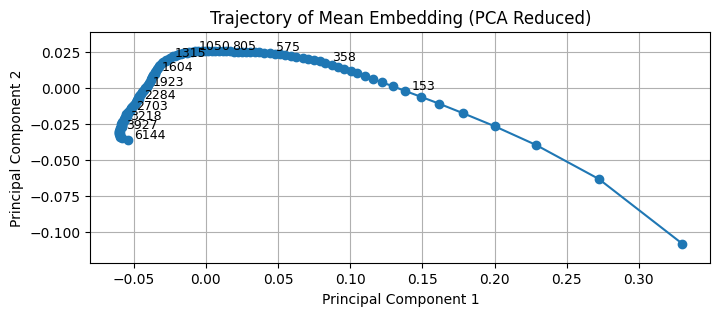

Explained variance ratio: [0.839632   0.08176017]
Total explained variance: 0.9213921700692843


In [51]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

X_means = np.stack(means)
pca = PCA(n_components=2, random_state=42)
means_2d = pca.fit_transform(X_means)

plt.figure(figsize=(8, 3))
plt.plot(means_2d[:, 0], means_2d[:, 1], marker='o', linestyle='-')
for i, (x, y) in enumerate(means_2d):
    if i % 10 == 0:
        plt.text(x + 0.01 * (plt.xlim()[1] - plt.xlim()[0]),
                y + 0.01 * (plt.ylim()[1] - plt.ylim()[0]),
                f'{chunk_sizes[i]}', fontsize=9)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Trajectory of Mean Embedding (PCA Reduced)')
plt.grid(True)
plt.axis('equal')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")


100%|██████████| 128/128 [00:51<00:00,  2.48it/s]


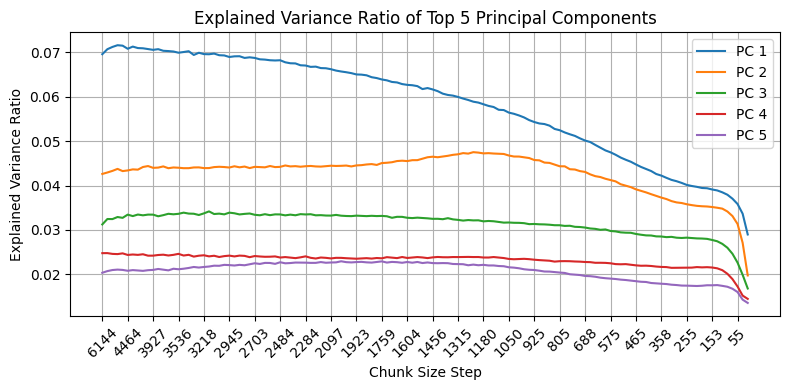

In [42]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

explained_variances = []
for group in tqdm(embeddings_evolved):
    pca = PCA()
    pca.fit(np.stack(group))
    explained_variances.append(pca.explained_variance_ratio_)

# Let's look at the explained variance ratio of the first few components
n_components_to_plot = min(5, explained_variances[0].shape[0])
plt.figure(figsize=(8, 4))

for i in range(n_components_to_plot):
    variance_ratios = [ev[i] for ev in explained_variances]
    plt.plot(variance_ratios, label=f'PC {i+1}')

plt.xlabel('Chunk Size Step')
plt.ylabel('Explained Variance Ratio')
plt.title(f'Explained Variance Ratio of Top {n_components_to_plot} Principal Components')
xticks = list(range(0, len(chunk_sizes), 5)) # Show fewer xticks for clarity
plt.xticks(xticks, labels=[str(chunk_sizes[i]) for i in xticks], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

100%|██████████| 128/128 [00:16<00:00,  7.59it/s]


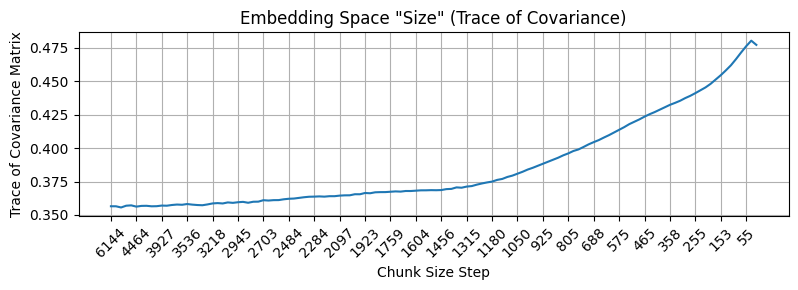

In [46]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already computed 'embeddings_evolved' and 'chunk_sizes'

covariance_traces = []
for group in tqdm(embeddings_evolved):
    X = np.stack(group)
    cov = np.cov(X, rowvar=False)
    trace = np.trace(cov)
    covariance_traces.append(trace)

plt.figure(figsize=(8, 3))
plt.plot(covariance_traces)
plt.xlabel('Chunk Size Step')
plt.ylabel('Trace of Covariance Matrix')
plt.title('Embedding Space "Size" (Trace of Covariance)')
xticks = list(range(0, len(chunk_sizes), 5))
plt.xticks(xticks, labels=[str(chunk_sizes[i]) for i in xticks], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

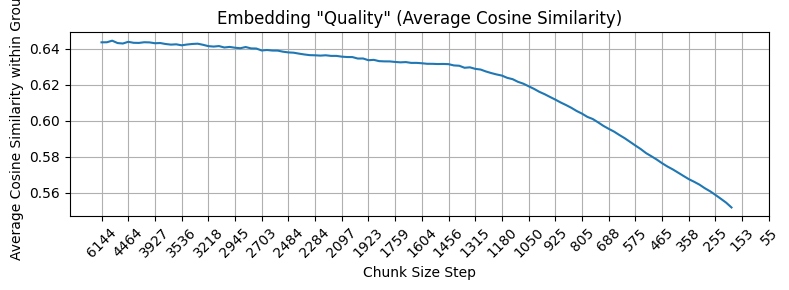

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

average_similarities = []
for group in tqdm(embeddings_evolved):
    similarity_matrix = cosine_similarity(np.stack(group))
    # Exclude the diagonal (similarity of an embedding with itself)
    n = len(group)
    if n > 1:
        sum_of_similarities = np.sum(similarity_matrix) - n
        average_similarity = sum_of_similarities / (n * (n - 1))
        average_similarities.append(average_similarity)
    else:
        average_similarities.append(1) # If only one embedding, similarity with itself is 1

plt.figure(figsize=(8, 3))
plt.plot(average_similarities)
plt.xlabel('Chunk Size Step')
plt.ylabel('Average Cosine Similarity within Group')
plt.title('Embedding "Quality" (Average Cosine Similarity)')
xticks = list(range(0, len(chunk_sizes), 5))
plt.xticks(xticks, labels=[str(chunk_sizes[i]) for i in xticks], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

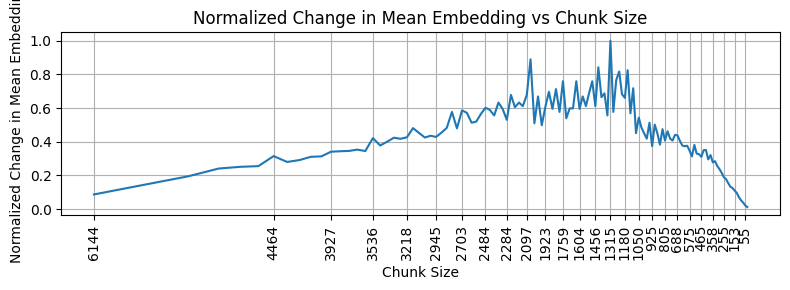

In [137]:
embedding_means = np.array([ np.mean(g, axis=0) for g in embeddings_evolved ])
embedding_means_diff = np.linalg.norm(np.diff(embedding_means, axis=0), axis=1)

plt.figure(figsize=(8, 3))
plt.plot(chunk_sizes[:-1], embedding_means_diff.min() / embedding_means_diff)
plt.xlabel('Chunk Size')
plt.ylabel('Normalized Change in Mean Embedding')
plt.title('Normalized Change in Mean Embedding vs Chunk Size')

xticks = list(range(0, len(chunk_sizes) - 1, 5))
plt.xticks([chunk_sizes[i] for i in xticks], rotation=90)
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.show()